<a href="https://colab.research.google.com/github/riezaferdi/Deadline-Tasks-Priorities/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.6/dist-packages (0.4.2)


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
#Buat Universe masing-masing parameter
#Antecedent
deadline = ctrl.Antecedent(np.arange(0, 11, 1), 'deadline')
kesulitan = ctrl.Antecedent(np.arange(0, 11, 1), 'kesulitan')
#Consequent
prioritas = ctrl.Consequent(np.arange(0, 11, 1), 'prioritas')

#hasil
concat = ctrl.Consequent(np.arange(0, 11, 1), 'concat')

#Fuzzifikasi
deadline['dekat'] = fuzz.trapmf(deadline.universe, [0, 0, 2, 8])
deadline['lama'] = fuzz.trapmf(deadline.universe, [2, 8, 11, 11])

kesulitan['mudah'] = fuzz.trapmf(kesulitan.universe, [0, 0, 4, 9])
kesulitan['sulit'] = fuzz.trapmf(kesulitan.universe, [4, 9, 11, 11])

prioritas['rendah'] = fuzz.trapmf(prioritas.universe, [0, 0, 3, 7])
prioritas['tinggi'] = fuzz.trapmf(prioritas.universe, [3, 7, 11, 11])


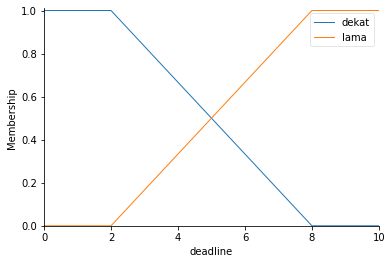

In [ ]:
deadline.view()

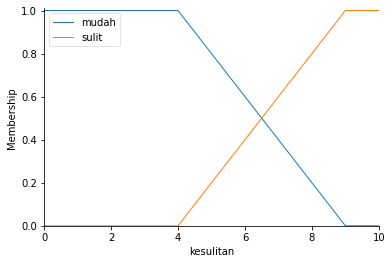

In [ ]:
kesulitan.view()

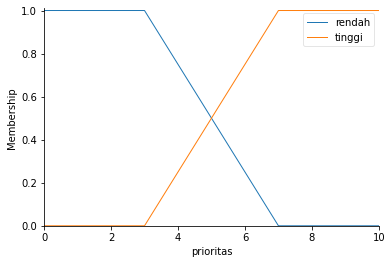

In [ ]:
prioritas.view()

RULES :

1. IF deadline DEKAT AND kesulitan SULIT THEN prioritas TINGGI

2. IF deadline DEKAT AND kesulitan MUDAH THEN prioritas TINGGI

3. IF deadline LAMA AND kesulitan SULIT THEN prioritas RENDAH

4. IF deadline LAMA AND kesulitan MUDAH THEN prioritas RENDAH

In [ ]:
def deadline_dekat(x):
  if x<=2:
    y = 1
  elif x>2 and x<8:
    y = (8-x)/(8-2)
  else:
    y = 0
  return y 

def deadline_lama(x):
  if x<=2:
    y = 0
  elif x>2 and x<8:
    y = (x-2)/(8-2)
  else:
    y = 1
  return y 

def kesulitan_mudah(x):
  if x<=4:
    y = 1
  elif x>4 and x<9:
    y = (9-x)/(9-4)
  else:
    y = 0
  return y 

def kesulitan_sulit(x):
  if x<=4:
    y = 0
  elif x>4 and x<9:
    y = (x-4)/(9-4)
  else:
    y = 1
  return y

def prioritas_rendah(x):
  if x<=3:
    y = 1
  elif x>3 and x<7:
    y = (7-x)/(7-3)
  else :
    y = 0
  return y

def prioritas_tinggi(x):
  if x<=3:
    y = 0
  elif x>3 and x<7:
    y = (x-3)/(7-3)
  else :
    y = 1
  return y

In [ ]:
#RULE 1
dl=5
ks=5

dl1=deadline_dekat(dl)
ks1=kesulitan_sulit(ks)
z1=min(dl1,ks1)

print("Deadline (dekat) = ", dl1)
print("Kesulitan (sulit) = ", ks1)

Deadline (dekat) =  0.5
Kesulitan (sulit) =  0.2


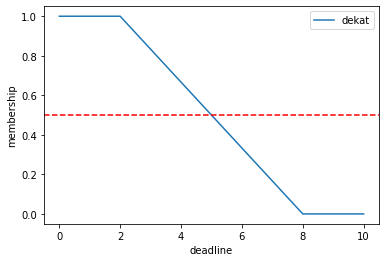

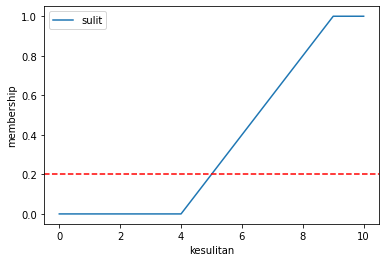

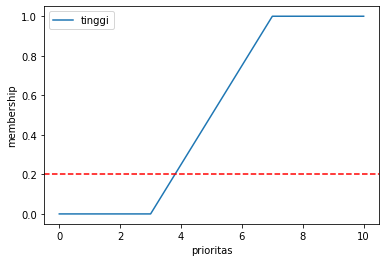

In [ ]:
n = 0
x_dekat=[]
y_dekat=[]
x_sulit=[]
y_sulit=[]
x_tinggi=[]
y_tinggi=[]
while n <= 10:
  x_dekat.append(n)
  y_dekat.append(deadline_dekat(n))
  x_sulit.append(n)
  y_sulit.append(kesulitan_sulit(n))
  x_tinggi.append(n)
  y_tinggi.append(prioritas_tinggi(n))
  n += 1

plt.plot(x_dekat,y_dekat, label="dekat")
plt.axhline(y=dl1, color="r", linestyle = "--")
plt.xlabel('deadline')
plt.ylabel('membership')
plt.legend()
plt.show()

plt.plot(x_sulit,y_sulit, label="sulit")
plt.axhline(y=ks1, color="r", linestyle = "--")
plt.xlabel('kesulitan')
plt.ylabel('membership')
plt.legend()
plt.show()

plt.plot(x_tinggi,y_tinggi, label="tinggi")
plt.axhline(y=z1, color="r", linestyle = "--")
plt.xlabel('prioritas')
plt.ylabel('membership')
plt.legend()
plt.show()

In [ ]:
#Rule 2
dl2 = deadline_dekat(dl)
ks2 = kesulitan_mudah(ks)
z2 = min(dl2,ks2)

print("Deadline (dekat) = ", dl2)
print("Kesulitan (sulit) = ", ks2)

Deadline (dekat) =  0.5
Kesulitan (sulit) =  0.8


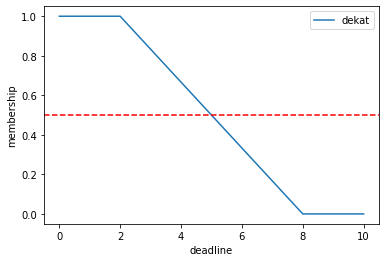

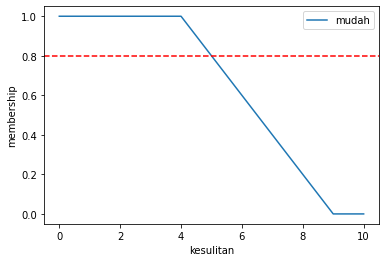

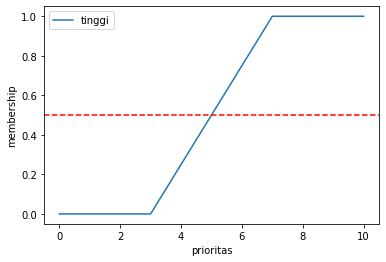

In [ ]:
n = 0
x_dekat=[]
y_dekat=[]
x_mudah=[]
y_mudah=[]
x_tinggi=[]
y_tinggi=[]
while n <= 10:
  x_dekat.append(n)
  y_dekat.append(deadline_dekat(n))
  x_mudah.append(n)
  y_mudah.append(kesulitan_mudah(n))
  x_tinggi.append(n)
  y_tinggi.append(prioritas_tinggi(n))
  n += 1

plt.plot(x_dekat,y_dekat, label="dekat")
plt.axhline(y=dl2, color="r", linestyle = "--")
plt.xlabel('deadline')
plt.ylabel('membership')
plt.legend()
plt.show()

plt.plot(x_mudah,y_mudah, label="mudah")
plt.axhline(y=ks2, color="r", linestyle = "--")
plt.xlabel('kesulitan')
plt.ylabel('membership')
plt.legend()
plt.show()

plt.plot(x_tinggi,y_tinggi, label="tinggi")
plt.axhline(y=z2, color="r", linestyle = "--")
plt.xlabel('prioritas')
plt.ylabel('membership')
plt.legend()
plt.show()

In [ ]:
#RULE 3
dl3 = deadline_lama(dl)
ks3 = kesulitan_sulit(ks)
z3 = min(dl3,ks3)

print("Deadline (lama) = ", dl3)
print("Kesulitan (sulit) = ", ks3)

Deadline (lama) =  0.5
Kesulitan (sulit) =  0.2


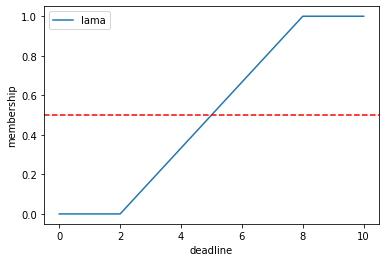

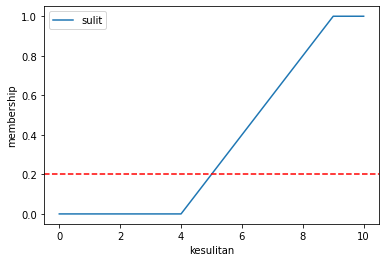

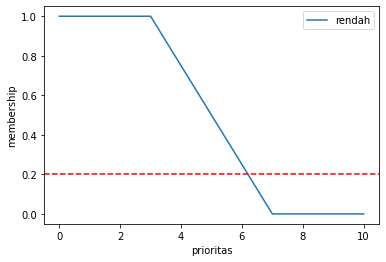

In [ ]:
n = 0
x_lama=[]
y_lama=[]
x_sulit=[]
y_sulit=[]
x_rendah=[]
y_rendah=[]
while n <= 10:
  x_lama.append(n)
  y_lama.append(deadline_lama(n))
  x_sulit.append(n)
  y_sulit.append(kesulitan_sulit(n))
  x_rendah.append(n)
  y_rendah.append(prioritas_rendah(n))
  n += 1

plt.plot(x_lama,y_lama, label="lama")
plt.axhline(y=dl3, color="r", linestyle = "--")
plt.xlabel('deadline')
plt.ylabel('membership')
plt.legend()
plt.show()

plt.plot(x_sulit,y_sulit, label="sulit")
plt.axhline(y=ks3, color="r", linestyle = "--")
plt.xlabel('kesulitan')
plt.ylabel('membership')
plt.legend()
plt.show()

plt.plot(x_rendah,y_rendah, label="rendah")
plt.axhline(y=z3, color="r", linestyle = "--")
plt.xlabel('prioritas')
plt.ylabel('membership')
plt.legend()
plt.show()

In [ ]:
#RULE 4
dl4=deadline_lama(dl)
ks4=kesulitan_mudah(ks)
z4 = min(dl4,ks4)

print(dl4, ks4)

0.5 0.8


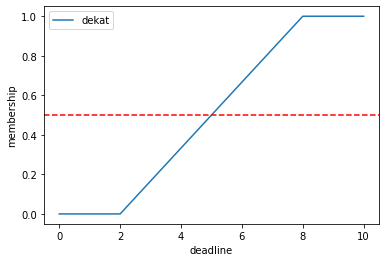

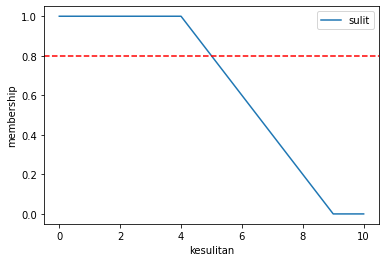

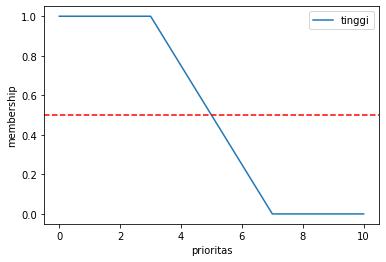

In [ ]:
n = 0
x_lama=[]
y_lama=[]
x_mudah=[]
y_mudah=[]
x_rendah=[]
y_rendah=[]
while n <= 10:
  x_lama.append(n)
  y_lama.append(deadline_lama(n))
  x_mudah.append(n)
  y_mudah.append(kesulitan_mudah(n))
  x_rendah.append(n)
  y_rendah.append(prioritas_rendah(n))
  n += 1

plt.plot(x_lama,y_lama, label="dekat")
plt.axhline(y=dl4, color="r", linestyle = "--")
plt.xlabel('deadline')
plt.ylabel('membership')
plt.legend()
plt.show()

plt.plot(x_mudah,y_mudah, label="sulit")
plt.axhline(y=ks4, color="r", linestyle = "--")
plt.xlabel('kesulitan')
plt.ylabel('membership')
plt.legend()
plt.show()

plt.plot(x_rendah,y_rendah, label="tinggi")
plt.axhline(y=z4, color="r", linestyle = "--")
plt.xlabel('prioritas')
plt.ylabel('membership')
plt.legend()
plt.show()

In [ ]:
#Inferensi dan Defuzzifikasi dengan Metode Sugeno



penyebut = z1+z2+z3+z4

def prio_tinggi(y):
  x = (4*y)+3
  return x

def prio_rendah(y):
  x = 7-(4*y)
  return x

tinggi1 = prio_tinggi(z1)
tinggi2 = prio_tinggi(z2)
rendah1 = prio_rendah(z3)
rendah2 = prio_rendah(z4)

pembilang = z1*tinggi1 + z2*tinggi2 + z3*rendah1 + z4*rendah2

z = pembilang/penyebut
print(z)

5.0


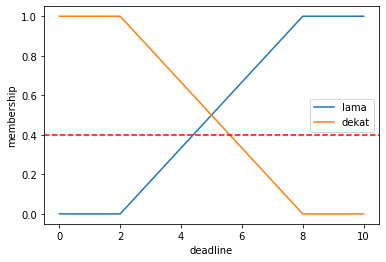

In [ ]:
n = 0
x_lama=[]
y_lama=[]
x_dekat=[]
y_dekat=[]
while n <= 10:
  x_lama.append(n)
  y_lama.append(deadline_lama(n))
  x_dekat.append(n)
  y_dekat.append(deadline_dekat(n))
  n += 1


plt.plot(x_lama,y_lama, label="lama")
plt.plot(x_dekat,y_dekat, label="dekat")
plt.axhline(y=0.4, color="r", linestyle = "--")
plt.xlabel('deadline')
plt.ylabel('membership')
plt.legend()
plt.show()